In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#from colocacion_de_creditos.utils.paths import data_dir

In [4]:
df_colocacion= pd.read_parquet('../Data/raw/df_final_estudiantes.parquet', engine='fastparquet')

In [5]:
df_colocacion.head()

,IDENTIFICACION,PRODUCTO,PERIODO_COMERCIAL,SEGMENTO,FECHA_CARGA,FECHA_VIGENCIA,REGION,N_VECES_CAMPAÑA,N_VECES_CAMPAÑA_CONT,TIPO_APROBACION,...,APROBACION_MES_ANTERIOR,PRODUCTO_MES_ANTERIOR,MONTO_COLOCADO,fecha_liquidacion,CANAL_VENTA,CONTACTABILIDAD_CELULAR,CONTACTABILIDAD_EMAIL,CONTACTABILIDAD_FIJO,CONTACTABILIDAD_TOTAL,COLOCADO
0,0523373,Producto1,202408,SEGMENTO1,2024-08-22,2024-09-13,NORTE,19,5,TIPO1,...,TIPO1,Producto1,NaN,None,None,AC,MK,AC,AC,0
1,0523373,Producto1,202405,SEGMENTO1,2024-05-11,2024-06-11,NORTE,16,2,TIPO1,...,TIPO1,Producto1,NaN,None,None,AC,MK,AC,AC,0
2,0523373,Producto1,202406,SEGMENTO1,2024-06-12,2024-07-12,NORTE,17,3,TIPO1,...,TIPO1,Producto1,NaN,None,None,AC,MK,AC,AC,0
3,0523374,Producto1,202403,SEGMENTO1,2024-03-11,2024-04-08,NORTE,21,7,TIPO1,...,TIPO1,Producto1,NaN,None,None,AC,AC,AC,AC,0
4,0523374,Producto1,202402,SEGMENTO1,2024-02-08,2024-03-10,NORTE,20,6,TIPO1,...,TIPO1,Producto1,NaN,None,None,AC,AC,AC,AC,0


In [6]:
df_colocacion.shape

(5178528, 27)

In [7]:
df_colocacion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5178528 entries, 0 to 5178527
Data columns (total 27 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   IDENTIFICACION           object 
 1   PRODUCTO                 object 
 2   PERIODO_COMERCIAL        int64  
 3   SEGMENTO                 object 
 4   FECHA_CARGA              object 
 5   FECHA_VIGENCIA           object 
 6   REGION                   object 
 7   N_VECES_CAMPAÑA          int64  
 8   N_VECES_CAMPAÑA_CONT     int64  
 9   TIPO_APROBACION          object 
 10  CANAL                    object 
 11  CLIENTE_BG               object 
 12  IVC                      int64  
 13  score_aceptacion         int64  
 14  SUB_PERFIL_RIESGOS       object 
 15  SCORE                    int64  
 16  CUPO                     float64
 17  APROBACION_MES_ANTERIOR  object 
 18  PRODUCTO_MES_ANTERIOR    object 
 19  MONTO_COLOCADO           float64
 20  fecha_liquidacion        object 
 21  CANAL_VE

In [8]:
df_colocacion.isna().sum()

IDENTIFICACION                   0
PRODUCTO                         0
PERIODO_COMERCIAL                0
SEGMENTO                         0
FECHA_CARGA                      0
FECHA_VIGENCIA                   0
REGION                           0
N_VECES_CAMPAÑA                  0
N_VECES_CAMPAÑA_CONT             0
TIPO_APROBACION                  0
CANAL                            0
CLIENTE_BG                       0
IVC                              0
score_aceptacion                 0
SUB_PERFIL_RIESGOS               0
SCORE                            0
CUPO                             0
APROBACION_MES_ANTERIOR     603226
PRODUCTO_MES_ANTERIOR       603226
MONTO_COLOCADO             5115038
fecha_liquidacion          5115038
CANAL_VENTA                5115038
CONTACTABILIDAD_CELULAR     170496
CONTACTABILIDAD_EMAIL        82292
CONTACTABILIDAD_FIJO        792987
CONTACTABILIDAD_TOTAL            0
COLOCADO                         0
dtype: int64

In [9]:
porcentaje_nulos = df_colocacion.isnull().mean() * 100
porcentaje_nulos

IDENTIFICACION              0.000000
PRODUCTO                    0.000000
PERIODO_COMERCIAL           0.000000
SEGMENTO                    0.000000
FECHA_CARGA                 0.000000
FECHA_VIGENCIA              0.000000
REGION                      0.000000
N_VECES_CAMPAÑA             0.000000
N_VECES_CAMPAÑA_CONT        0.000000
TIPO_APROBACION             0.000000
CANAL                       0.000000
CLIENTE_BG                  0.000000
IVC                         0.000000
score_aceptacion            0.000000
SUB_PERFIL_RIESGOS          0.000000
SCORE                       0.000000
CUPO                        0.000000
APROBACION_MES_ANTERIOR    11.648600
PRODUCTO_MES_ANTERIOR      11.648600
MONTO_COLOCADO             98.773976
fecha_liquidacion          98.773976
CANAL_VENTA                98.773976
CONTACTABILIDAD_CELULAR     3.292364
CONTACTABILIDAD_EMAIL       1.589100
CONTACTABILIDAD_FIJO       15.312981
CONTACTABILIDAD_TOTAL       0.000000
COLOCADO                    0.000000
d

podemos visualizar que las unicos valores nulos que tenemos son , APROBACION_MES_ANTERIOR,PRODUCTO_MES_ANTERIOR que hace referencia a que quizas no estuvieron en campaña el mes anterior.
las variables de MONTO_COLOCADO,fecha_liquidacion,CANAL_VENTA , tenemos una gran cantidad de valores nulos debido que solo se colocaron 63490 creditos mientras que los otros no.
y tenemos tambien valores nulos en la contactibilidad tanto de email, fijo  y celular que pueden ser posibles debido a que no se proporcionaron datos para ese tipo de contactibilidad.

In [11]:
print(df_colocacion.CONTACTABILIDAD_CELULAR.value_counts())
print(df_colocacion.CONTACTABILIDAD_CELULAR.unique())

CONTACTABILIDAD_CELULAR
AC    4626733
ND     381064
BC        235
Name: count, dtype: int64
['AC' 'ND' None 'BC']


In [12]:
print(df_colocacion.CONTACTABILIDAD_EMAIL.value_counts())
print(df_colocacion.CONTACTABILIDAD_EMAIL.unique())

CONTACTABILIDAD_EMAIL
AC    2804609
MK    1078662
ND     613636
       599329
Name: count, dtype: int64
['MK' 'AC' 'ND' '' None]


In [13]:
print(df_colocacion.CONTACTABILIDAD_FIJO.value_counts())
print(df_colocacion.CONTACTABILIDAD_FIJO.unique())

CONTACTABILIDAD_FIJO
AC    2663348
ND    1721063
BC        703
NV        427
Name: count, dtype: int64
['AC' 'ND' None 'NV' 'BC']


In [14]:
print(df_colocacion.CONTACTABILIDAD_TOTAL.value_counts())
print(df_colocacion.CONTACTABILIDAD_TOTAL.unique())

CONTACTABILIDAD_TOTAL
AC    4783638
ND     394890
Name: count, dtype: int64
['AC' 'ND']


para las variables   APROBACION_MES_ANTERIOR y PRODUCTO_MES_ANTERIOR como estos valores representan una situación donde no se ha tenido ninguna interacción previa, podrías reemplazar los valores nulos por "Ninguno"

In [16]:
columnas_nulos=["APROBACION_MES_ANTERIOR","PRODUCTO_MES_ANTERIOR"]
df_colocacion[columnas_nulos] = df_colocacion[columnas_nulos].fillna('Ninguno')

In [17]:
df_colocacion['MONTO_COLOCADO'] = df_colocacion['MONTO_COLOCADO'].fillna(0)  # Imputar 0 cuando no se ha liquidado
df_colocacion['fecha_liquidacion'] = df_colocacion['fecha_liquidacion'].fillna('Ninguno')  # Fecha predeterminada para registros sin fecha

Se eliminarán las columnas CANAL_VENTA debido a que la variable CANAL ya contiene la misma información, lo que hace que CANAL_VENTA sea redundante en este contexto. Además, las variables relacionadas con los niveles de CONTACTABILIDAD_CELULAR, CONTACTABILIDAD_EMAIL y CONTACTABILIDAD_FIJO también se eliminarán, ya que trabajaremos con la variable CONTACTABILIDAD_TOTAL, la cual ya encapsula el nivel total de contacto del cliente a través de todos los medios posibles.

In [19]:
df_colocacion.drop(columns=["CANAL_VENTA","CONTACTABILIDAD_EMAIL","CONTACTABILIDAD_FIJO","CONTACTABILIDAD_CELULAR"],inplace=True)

In [20]:
df_colocacion.isna().sum()

IDENTIFICACION             0
PRODUCTO                   0
PERIODO_COMERCIAL          0
SEGMENTO                   0
FECHA_CARGA                0
FECHA_VIGENCIA             0
REGION                     0
N_VECES_CAMPAÑA            0
N_VECES_CAMPAÑA_CONT       0
TIPO_APROBACION            0
CANAL                      0
CLIENTE_BG                 0
IVC                        0
score_aceptacion           0
SUB_PERFIL_RIESGOS         0
SCORE                      0
CUPO                       0
APROBACION_MES_ANTERIOR    0
PRODUCTO_MES_ANTERIOR      0
MONTO_COLOCADO             0
fecha_liquidacion          0
CONTACTABILIDAD_TOTAL      0
COLOCADO                   0
dtype: int64

In [21]:
df_colocacion[df_colocacion.IDENTIFICACION=="0171498"]

,IDENTIFICACION,PRODUCTO,PERIODO_COMERCIAL,SEGMENTO,FECHA_CARGA,FECHA_VIGENCIA,REGION,N_VECES_CAMPAÑA,N_VECES_CAMPAÑA_CONT,TIPO_APROBACION,...,score_aceptacion,SUB_PERFIL_RIESGOS,SCORE,CUPO,APROBACION_MES_ANTERIOR,PRODUCTO_MES_ANTERIOR,MONTO_COLOCADO,fecha_liquidacion,CONTACTABILIDAD_TOTAL,COLOCADO
2673113,0171498,Producto1,202401,SEGMENTO1,2024-01-09,2024-02-08,CENTRO,16,2,TIPO1,...,633,PERFIL1,950,3803.09,TIPO1,Producto1,1075.190,2024-02-03,AC,1
2673114,0171498,Producto1,202401,SEGMENTO1,2024-01-09,2024-02-08,CENTRO,16,2,TIPO1,...,633,PERFIL1,950,3803.09,TIPO1,Producto1,1055.705,2024-01-22,AC,1
2673115,0171498,Producto1,202401,SEGMENTO1,2024-01-09,2024-02-08,CENTRO,16,2,TIPO1,...,633,PERFIL1,950,3803.09,TIPO1,Producto1,1192.100,2024-01-31,AC,1
2673116,0171498,Producto1,202401,SEGMENTO1,2024-01-09,2024-02-08,CENTRO,16,2,TIPO1,...,633,PERFIL1,950,3803.09,TIPO1,Producto1,997.250,2024-01-14,AC,1
2673117,0171498,Producto1,202401,SEGMENTO1,2024-01-09,2024-02-08,CENTRO,16,2,TIPO1,...,633,PERFIL1,950,3803.09,TIPO1,Producto1,1055.705,2024-01-26,AC,1


a partir de esta observacion podemos ver que tenemos valores repetidos  ,una persona solo puede estar una vez por perido, pueden haber 2 periodos por mes .
una persona puede dividir las liquidaciones en algunas fechas por ello las filas repetidas.

observamos que las unicas columnas que cambian son el monto colocado ya que se paga el monto por parte  y la fecha de liquidacion que es la fecha en que se hace la acreditacion, por lo que vamos a agrupar por identificador y por fecha de campaña , vamos a sumar los montos colocados y dejar la ultima fecha de liquidacion 

In [24]:
df_colocacion=df_colocacion.sort_values(by=["IDENTIFICACION","PERIODO_COMERCIAL","fecha_liquidacion"])

In [25]:
#las unicas variables que se repiten son monto colocado y fecha de liquidacion de estos
columnas_no_cambian=df_colocacion.drop(columns=["MONTO_COLOCADO","fecha_liquidacion"]).columns
columnas_no_cambian

Index(['IDENTIFICACION', 'PRODUCTO', 'PERIODO_COMERCIAL', 'SEGMENTO',
       'FECHA_CARGA', 'FECHA_VIGENCIA', 'REGION', 'N_VECES_CAMPAÑA',
       'N_VECES_CAMPAÑA_CONT', 'TIPO_APROBACION', 'CANAL', 'CLIENTE_BG', 'IVC',
       'score_aceptacion', 'SUB_PERFIL_RIESGOS', 'SCORE', 'CUPO',
       'APROBACION_MES_ANTERIOR', 'PRODUCTO_MES_ANTERIOR',
       'CONTACTABILIDAD_TOTAL', 'COLOCADO'],
      dtype='object')

In [26]:
df_colocacion_agrupado = (
    df_colocacion.groupby(['IDENTIFICACION','PERIODO_COMERCIAL'], as_index=False)
      .agg({
          # Para las columnas categóricas, tomar el primer valor
          **{col: 'first' for col in columnas_no_cambian},
          # Para las columnas numéricas, aplicar la suma
          'fecha_liquidacion': 'last',
          'MONTO_COLOCADO': 'sum'
      })
)

In [27]:
df_colocacion_agrupado[df_colocacion_agrupado.IDENTIFICACION=="0171498"]

,IDENTIFICACION,PRODUCTO,PERIODO_COMERCIAL,SEGMENTO,FECHA_CARGA,FECHA_VIGENCIA,REGION,N_VECES_CAMPAÑA,N_VECES_CAMPAÑA_CONT,TIPO_APROBACION,...,score_aceptacion,SUB_PERFIL_RIESGOS,SCORE,CUPO,APROBACION_MES_ANTERIOR,PRODUCTO_MES_ANTERIOR,CONTACTABILIDAD_TOTAL,COLOCADO,fecha_liquidacion,MONTO_COLOCADO
756741,0171498,Producto1,202401,SEGMENTO1,2024-01-09,2024-02-08,CENTRO,16,2,TIPO1,...,633,PERFIL1,950,3803.09,TIPO1,Producto1,AC,1,2024-02-03,5375.95


observamos que despues de realizar esta transformacion obtenemos los datos ya corregidos , por lo que volvemos a analizar

In [29]:
print("tamaño del los datos antes de tratarlos",df_colocacion.shape)
print("tamaño del los datos despues de tratarlos",df_colocacion_agrupado.shape)


tamaño del los datos antes de tratarlos (5178528, 23)
tamaño del los datos despues de tratarlos (5178206, 23)


In [30]:
#tranaformamos los tipos de datos de fechas a  tipo datetime 
df_colocacion_agrupado.FECHA_CARGA=pd.to_datetime(df_colocacion_agrupado.FECHA_CARGA)
df_colocacion_agrupado.FECHA_CARGA=pd.to_datetime(df_colocacion_agrupado.FECHA_VIGENCIA)

In [31]:
df_colocacion_agrupado.PERIODO_COMERCIAL=pd.to_datetime(df_colocacion_agrupado.PERIODO_COMERCIAL, format='%Y%m')

Anlizamos las varibles numericas y categoricas

In [33]:
numericas_columns = df_colocacion_agrupado.select_dtypes(include=['number']).columns
numericas_columns

Index(['N_VECES_CAMPAÑA', 'N_VECES_CAMPAÑA_CONT', 'IVC', 'score_aceptacion',
       'SCORE', 'CUPO', 'COLOCADO', 'MONTO_COLOCADO'],
      dtype='object')

In [34]:
categorical_columnns = df_colocacion_agrupado.select_dtypes(exclude=['number']).columns
categorical_columnns


Index(['IDENTIFICACION', 'PRODUCTO', 'PERIODO_COMERCIAL', 'SEGMENTO',
       'FECHA_CARGA', 'FECHA_VIGENCIA', 'REGION', 'TIPO_APROBACION', 'CANAL',
       'CLIENTE_BG', 'SUB_PERFIL_RIESGOS', 'APROBACION_MES_ANTERIOR',
       'PRODUCTO_MES_ANTERIOR', 'CONTACTABILIDAD_TOTAL', 'fecha_liquidacion'],
      dtype='object')

In [35]:
for columna in categorical_columnns:
    print(f"columna: {columna} -> valores únicos: {df_colocacion_agrupado[columna].unique()}")

columna: IDENTIFICACION -> valores únicos: ['0000001' '0000002' '0000003' ... '1171032' '1171033' '1171034']
columna: PRODUCTO -> valores únicos: ['Producto1']
columna: PERIODO_COMERCIAL -> valores únicos: <DatetimeArray>
['2024-01-01 00:00:00', '2024-02-01 00:00:00', '2024-03-01 00:00:00',
 '2024-04-01 00:00:00', '2024-05-01 00:00:00', '2024-06-01 00:00:00',
 '2024-07-01 00:00:00', '2024-10-01 00:00:00', '2024-08-01 00:00:00',
 '2024-09-01 00:00:00']
Length: 10, dtype: datetime64[ns]
columna: SEGMENTO -> valores únicos: ['SEGMENTO1' 'SEGMENTO3' 'SEGMENTO4' 'SEGMENTO2' 'SEGMENTO5' 'SEGMENTO6'
 'SEGMENTO7']
columna: FECHA_CARGA -> valores únicos: <DatetimeArray>
['2024-02-08 00:00:00', '2024-03-10 00:00:00', '2024-04-08 00:00:00',
 '2024-05-10 00:00:00', '2024-06-11 00:00:00', '2024-07-12 00:00:00',
 '2024-08-21 00:00:00', '2024-11-17 00:00:00', '2024-09-13 00:00:00',
 '2024-10-18 00:00:00']
Length: 10, dtype: datetime64[ns]
columna: FECHA_VIGENCIA -> valores únicos: ['2024-02-08' '2024

observamos que no hay erroes con las variables categoricas.

In [37]:
# Verificar el rango de valores en la columna SCORE
score_min = df_colocacion_agrupado['SCORE'].min()
score_max = df_colocacion_agrupado['SCORE'].max()
print(f"Rango de SCORE: {score_min} a {score_max}")

Rango de SCORE: 700 a 994


In [38]:
# Crear intervalos de SCORE con un rango más amplio
df_colocacion_agrupado['SCORE_INTERVAL'] = pd.cut(df_colocacion_agrupado['SCORE'], bins=range(score_min, score_max + 50, 50), labels=[f"{i}-{i+50}" for i in range(score_min, score_max, 50)])

# Verificar los primeros datos para asegurar la creación correcta de los intervalos
print(df_colocacion_agrupado[['SCORE', 'SCORE_INTERVAL']].head())

   SCORE SCORE_INTERVAL
0    979       950-1000
1    969       950-1000
2    969       950-1000
3    969       950-1000
4    969       950-1000


C:\Users\ferna\AppData\Local\Temp\ipykernel_7432\1727892205.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_agrupado = df_colocacion_agrupado.groupby('SCORE_INTERVAL')['MONTO_COLOCADO'].mean().reset_index()


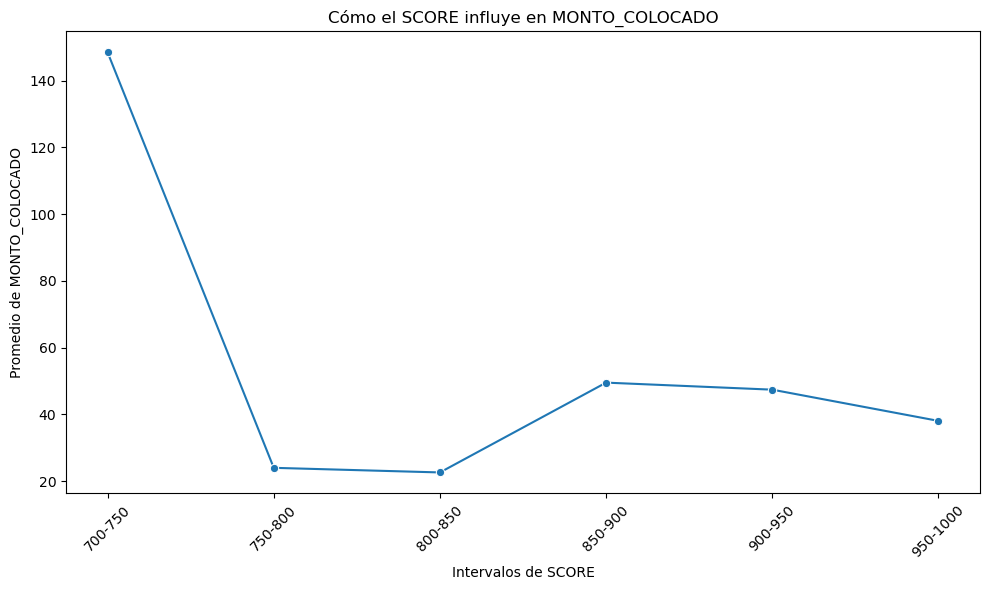

In [39]:
# Calcular el promedio de MONTO_COLOCADO por intervalo de SCORE
df_agrupado = df_colocacion_agrupado.groupby('SCORE_INTERVAL')['MONTO_COLOCADO'].mean().reset_index()

# Crear el gráfico de líneas
plt.figure(figsize=(10,6))
sns.lineplot(x='SCORE_INTERVAL', y='MONTO_COLOCADO', data=df_agrupado, marker='o')
plt.title("Cómo el SCORE influye en MONTO_COLOCADO")
plt.xlabel("Intervalos de SCORE")
plt.ylabel("Promedio de MONTO_COLOCADO")
plt.xticks(rotation=45)  # Rotar etiquetas para mejor lectura
plt.tight_layout()
plt.show()

El monto colocado es mayor a menor sea el intervalos de Score, como es en 700-750, no existe mayor variación 750-850 a su vez es el punto más bajo del score, desde 850 a 1000 existe poca variación y una subida ligera. Sin embargo, no es a comparción que en el primer rango.

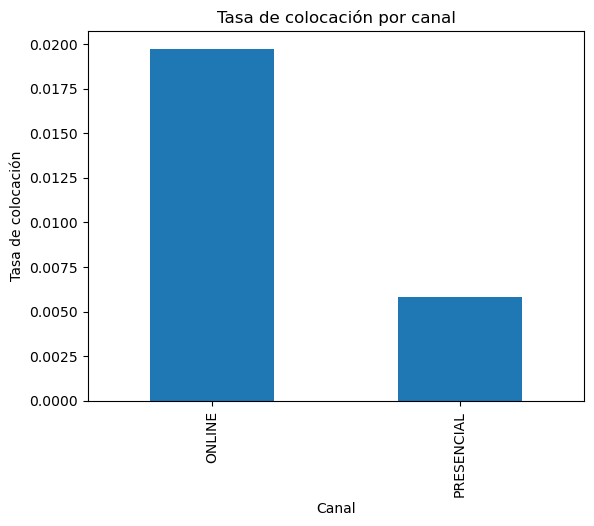

In [41]:
channel_analysis = df_colocacion_agrupado.groupby('CANAL')['COLOCADO'].mean()
channel_analysis.plot(kind='bar')
plt.title('Tasa de colocación por canal')
plt.ylabel('Tasa de colocación')
plt.xlabel('Canal')
plt.show()


Muestra el imapcto según el canal de comunicación, lo cual como resultado representa que se tiene mayor impacto por canal online que presencial.

In [43]:
channel_analysis

CANAL
ONLINE        0.019735
PRESENCIAL    0.005814
Name: COLOCADO, dtype: float64

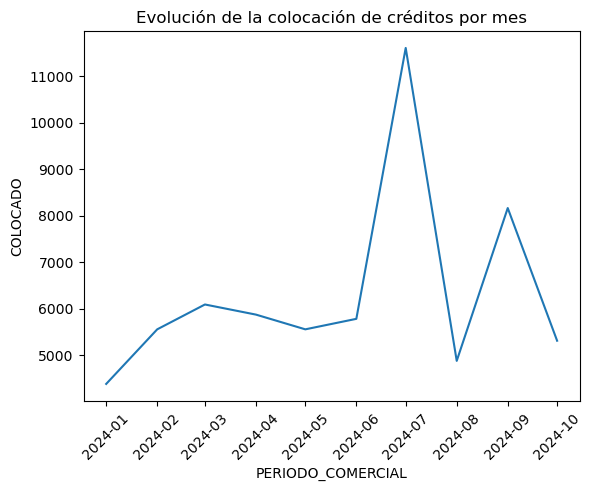

In [78]:
#Visualización de la evolución mensual por la colocación 
monthly_data = df_colocacion_agrupado.groupby('PERIODO_COMERCIAL')['COLOCADO'].sum().reset_index() 
# Visualización de la evolución mensual de la colocación 
sns.lineplot(x='PERIODO_COMERCIAL', y='COLOCADO', data=monthly_data) 
plt.title('Evolución de la colocación de créditos por mes') 
plt.xticks(rotation=45) 
plt.show()

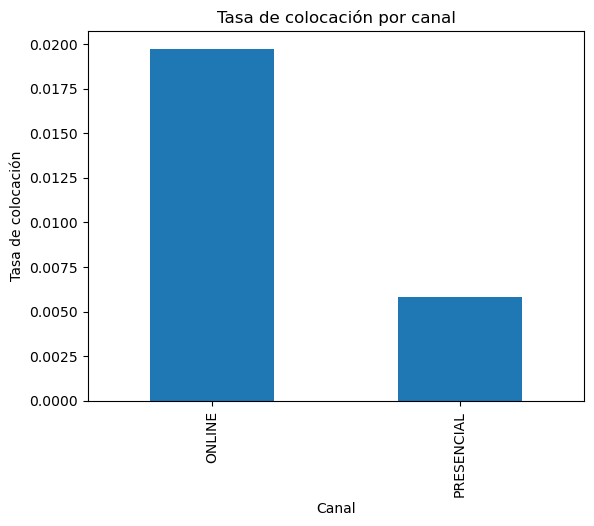

In [80]:
#Nivel de aceptación por perfil 
profile_analysis = df_colocacion_agrupado.groupby('CANAL')['COLOCADO'].mean()
channel_analysis.plot(kind='bar')
plt.title('Tasa de colocación por canal')
plt.ylabel('Tasa de colocación')
plt.xlabel('Canal')
plt.show()
